In [1]:
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential 
from keras.layers import Dense
import tensorflow as tf
import pandas as pd

# Vetores média que representam os centros das nuvens de 
# distribuições gaussianas

m1 = np.array([0,0,0,0,0,0,0,0]).T
m2 = np.array([4,0,0,0,0,0,0,0]).T
m3 = np.array([0,0,0,4,0,0,0,0]).T
m4 = np.array([0,0,0,0,0,0,0,4]).T

# Gerando as nuvens de dados

nuvem_dados_1 = np.random.normal(m1,1,(1000,8))
nuvem_dados_2 = np.random.normal(m2,1,(1000,8))
nuvem_dados_3 = np.random.normal(m3,1,(1000,8))
nuvem_dados_4 = np.random.normal(m4,1,(1000,8))

# **Criação do Dataset**

In [2]:
dataset = np.concatenate([nuvem_dados_1,nuvem_dados_2,nuvem_dados_3,nuvem_dados_4])

# **Estrutura da Rede**

In [ ]:
# Rede Autoenconder

model = Sequential()
model.add(Dense(8,activation='linear',input_dim=8))
model.add(Dense(2, activation='linear'))
model.add(Dense(8,activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


# **Treino**

In [ ]:
model.compile(loss=keras.losses.mean_squared_error, metrics=['accuracy'])
model.fit(dataset,dataset,epochs=2000,verbose=False)

# **Teste**

In [ ]:
from keras import backend as kend

get_first_layer_output = kend.function([model.layers[0].input],
                                  [model.layers[1].output])

layer_output = get_first_layer_output([dataset])
layer_output = np.array(layer_output[0])

predict = model.predict(dataset)
np.mean(predict-dataset)

0.0006515177570177713

In [ ]:
#model.layers[0].input
model.layers[1].output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_1')>

# **Visualização dos Dados em 2 Dimensões**

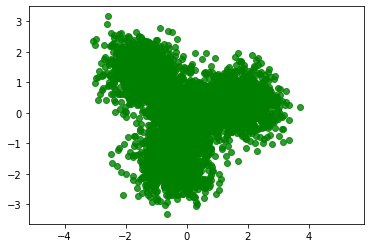

In [ ]:
plt.scatter(layer_output[:,0], layer_output[:,1], alpha=0.8, c='g')
plt.axis('equal');